<span style="font-family: Arial; font-weight:bold;font-size:2.1em;color:#fff;">-----------------------------------
    
<span style="font-family: Arial; font-weight:bold;font-size:2.1em;color:#fa9200;">Testing out Indicators across various Stocks to Validate
    
<span style="font-family: Arial; font-weight:bold;font-size:2.1em;color:#fff;">-----------------------------------

# Import Packages

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from datetime import date, datetime
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.formula.api as sm
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import yfinance as yf
from scipy.signal import argrelextrema
from collections import defaultdict
import sqlite3
import Indicators

# Grab Data for Ticker

In [2]:
tickers = Indicators.save_sp500_tickers()
ticker = tickers[0]
df = Indicators.get_ticker(ticker,500)
df

datetime        open        high         low  \
0    2022-03-14 09:30:00-04:00  141.449997  144.080002  141.449997   
1    2022-03-14 10:30:00-04:00  143.860001  144.600006  143.764999   
2    2022-03-14 11:30:00-04:00  144.119995  144.970001  143.839996   
3    2022-03-14 12:30:00-04:00  144.940002  145.289993  143.882996   
4    2022-03-14 13:30:00-04:00  144.050003  144.050003  142.389999   
...                        ...         ...         ...         ...   
3486 2024-03-08 11:30:00-05:00   94.165001   94.260002   93.830002   
3487 2024-03-08 12:30:00-05:00   94.150002   94.220001   93.739998   
3488 2024-03-08 13:30:00-05:00   93.949997   94.190002   93.690002   
3489 2024-03-08 14:30:00-05:00   94.150002   94.309998   93.919998   
3490 2024-03-08 15:30:00-05:00   93.919998   94.080002   93.879997   

           close  volume  dividends  stock splits                date  
0     143.830002  748441        0.0           0.0 2022-03-14 09:30:00  
1     144.130005  445288        0.0           0.0 2022-03-14 10:30:00  
2     144.970001  460009        0.0           0.0 2022-03-14 11:30:00  
3     144.030197  376413        0.0           0.0 2022-03-14 12:30:00  
4     142.445007  351349        0.0           0.0 2022-03-14 13:30:00  
...          ...     ...        ...           ...                 ...  
3486   94.160004  348202        0.0           0.0 2024-03-08 11:30:00  
3487   93.970001  343806        0.0           0.0 2024-03-08 12:30:00  
3488   94.150002  311379        0.0           0.0 2024-03-08 13:30:00  
3489   93.930000  384143        0.0           0.0 2024-03-08 14:30:00  
3490   93.900002  668308        0.0           0.0 2024-03-08 15:30:00  

[3491 rows x 9 columns]

# Add SMA, Min/Max, Events

In [5]:
SMAs = [30,60,90]
smoothing = 10
window = 15

df = Indicators.get_sma(df,SMAs)
minmax = Indicators.get_max_min(df, smoothing, window)
invhs = Indicators.find_IHS(minmax).reset_index(drop=True)
fw = Indicators.find_FW(minmax,.03).reset_index(drop=True)
df

datetime        open        high         low  \
0    2022-03-14 09:30:00-04:00  150.729996  151.479996  149.020004   
1    2022-03-14 10:30:00-04:00  151.479996  152.869995  151.429993   
2    2022-03-14 11:30:00-04:00  152.619995  152.970001  152.250000   
3    2022-03-14 12:30:00-04:00  152.699997  152.889999  152.270004   
4    2022-03-14 13:30:00-04:00  152.440002  152.460007  151.539993   
...                        ...         ...         ...         ...   
3486 2024-03-08 11:30:00-05:00  181.460007  181.820007  180.910004   
3487 2024-03-08 12:30:00-05:00  181.000000  181.080002  180.089996   
3488 2024-03-08 13:30:00-05:00  180.134995  180.160004  179.240005   
3489 2024-03-08 14:30:00-05:00  179.899994  180.070007  179.610001   
3490 2024-03-08 15:30:00-05:00  179.685699  179.929993  178.679993   

           close   volume  dividends  stock splits                date  \
0     151.479996  1150711        0.0           0.0 2022-03-14 09:30:00   
1     152.610001  1022201        0.0           0.0 2022-03-14 10:30:00   
2     152.690002   839209        0.0           0.0 2022-03-14 11:30:00   
3     152.440002   912086        0.0           0.0 2022-03-14 12:30:00   
4     151.839996   784879        0.0           0.0 2022-03-14 13:30:00   
...          ...      ...        ...           ...                 ...   
3486  181.020996   466493        0.0           0.0 2024-03-08 11:30:00   
3487  180.149994   606921        0.0           0.0 2024-03-08 12:30:00   
3488  179.899994   768157        0.0           0.0 2024-03-08 13:30:00   
3489  179.679993   796973        0.0           0.0 2024-03-08 14:30:00   
3490  178.850006   815211        0.0           0.0 2024-03-08 15:30:00   

           SMA30       SMA60       SMA90  
0            NaN         NaN         NaN  
1            NaN         NaN         NaN  
2            NaN         NaN         NaN  
3            NaN         NaN         NaN  
4            NaN         NaN         NaN  
...          ...         ...         ...  
3486  179.824276  178.803808  178.177920  
3487  179.885776  178.826641  178.211732  
3488  179.961443  178.862307  178.248010  
3489  180.047776  178.877474  178.291677  
3490  180.101776  178.877641  178.327066  

[3491 rows x 12 columns]

# Plot Data

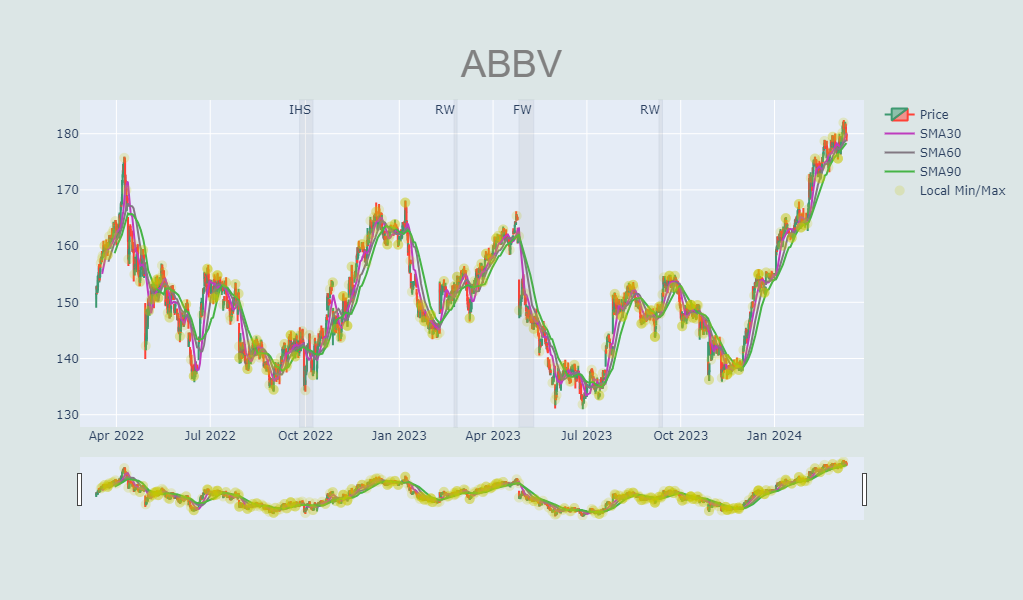

In [11]:
fig = go.Figure()
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'],
                name='Price')])
for n in SMAs:
    rgb = 'rgb({},{},{})'.format(250-n*2,n*2,250-n*2)
    fig.add_trace(go.Scatter(x=df['date'],
                y=df['SMA{}'.format(n)],
                mode='lines',
                name='SMA{}'.format(n),
                line=dict(color=rgb)))
fig.add_trace(go.Scatter(x=minmax['date'],
                y=minmax['close'],
                mode='markers',
                name='Local Min/Max',
                marker=dict(color='rgb(200,200,0)',
                            size=10,
                            opacity=0.2)
                        ))
# iterate through the shaded regions dataframe

for index, row in invhs.iterrows():
    
    # retrieve the dates
    start = row['start_event']
    end = row['end_event']

    # add shaded region
    fig.add_vrect(
            x0=start,
            x1=end,
            fillcolor="grey",
            opacity=0.1,
            line_width=1,
            annotation_text='IHS'
        )   
# iterate through the shaded regions dataframe
for index, row in fw.iterrows():
    
    # retrieve the dates
    start = row['start_event']
    end = row['end_event']

    # add shaded region
    fig.add_vrect(
            x0=start,
            x1=end,
            fillcolor="grey",
            opacity=0.1,
            line_width=1,
            annotation_text='FW'
        )  
for index, row in rw.iterrows():
    
    # retrieve the dates
    start = row['start_event']
    end = row['end_event']

    # add shaded region
    fig.add_vrect(
            x0=start,
            x1=end,
            fillcolor="grey",
            opacity=0.1,
            line_width=1,
            annotation_text='RW'
        )  
fig.update_xaxes(
        rangeslider_visible=True,
        rangebreaks=[
            # NOTE: Below values are bound (not single values), ie. hide x to y
            dict(bounds=["sat", "mon"]),  # hide weekends, eg. hide sat to before mon
            dict(bounds=[16, 9.5], pattern="hour"),  # hide hours outside of 9.30am-4pm
            #dict(values=["2024-12-25", "2024-01-01","2024-01-15","2024-02-19"])  # hide holidays (Christmas and New Year's, etc)
        ]
    )
fig.update_layout(title={'text':ticker, 'xanchor':'center', 'yanchor':'top','x':0.5},
                height=600,
                title_font={"family":"arial","color":"gray","size":38},
                paper_bgcolor='rgb(220,230,230)'
                 )
fig.show()

# Loop Thru Tickers to find FW

In [6]:
i = 0
fw = pd.DataFrame()
while len(fw)<1 and i<500:
    ticker = tickers[i]
    df = Indicators.get_ticker(ticker,500)
    df = Indicators.get_sma(df,SMAs)
    minmax = Indicators.get_max_min(df, smoothing, window)
    invhs = Indicators.find_IHS(minmax).reset_index(drop=True)
    hs = Indicators.find_HS(minmax).reset_index(drop=True)
    fw = Indicators.find_FW(minmax,.03).reset_index(drop=True)
    rw = Indicators.find_RW(minmax,.03).reset_index(drop=True)
    i += 1
fw

start_event           end_event event
0 2023-04-27 09:30:00 2023-05-11 10:30:00    FW

# Testing out Toggle for Indicators

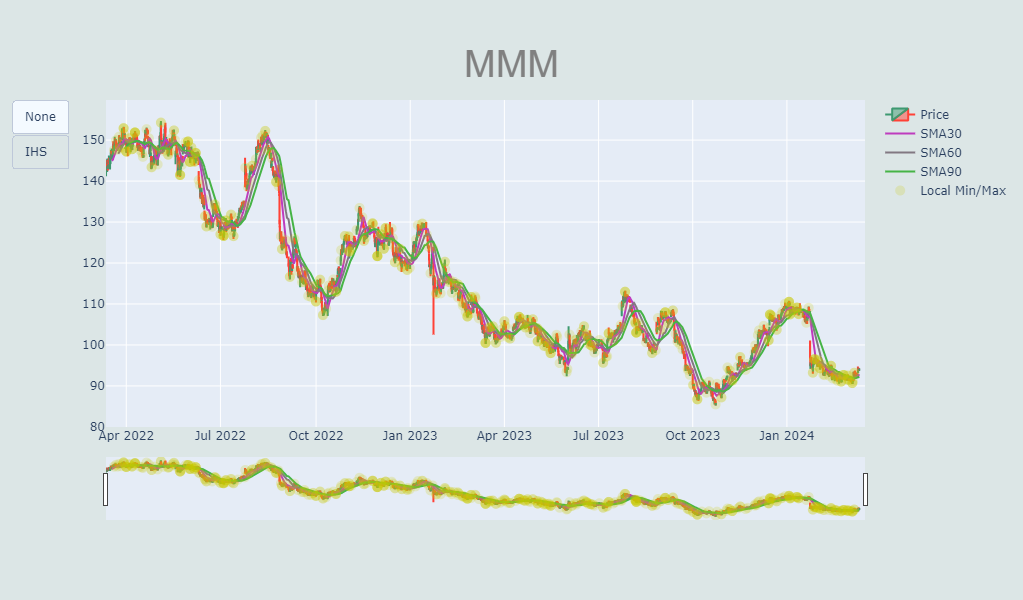

In [14]:
fig = go.Figure()
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'],
                name='Price')])
for n in SMAs:
    rgb = 'rgb({},{},{})'.format(250-n*2,n*2,250-n*2)
    fig.add_trace(go.Scatter(x=df['date'],
                y=df['SMA{}'.format(n)],
                mode='lines',
                name='SMA{}'.format(n),
                line=dict(color=rgb)))
fig.add_trace(go.Scatter(x=minmax['date'],
                y=minmax['close'],
                mode='markers',
                name='Local Min/Max',
                marker=dict(color='rgb(200,200,0)',
                            size=10,
                            opacity=0.2)
                        ))
# iterate through the shaded regions dataframe

hs_dict = {}
for index, row in invhs.iterrows():
    
    # retrieve the dates
    start = row['start_event']
    end = row['end_event']

    # add shaded region
    hs = [dict(type="vrect",
            x0=start,
            x1=end,
            fillcolor="grey",
            opacity=0.1,
            line_width=1,
            annotation_text='IHS'
        )]
    hs_dict[index]=hs
    
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            buttons=[
                dict(label="None",
                     method="relayout",
                     args=["shapes", []]),
                dict(label="IHS",
                     method="relayout",
                     args=["shapes", hs_dict[0]])
            ],
        )
    ]
)
fig.update_xaxes(
        rangeslider_visible=True,
        rangebreaks=[
            # NOTE: Below values are bound (not single values), ie. hide x to y
            dict(bounds=["sat", "mon"]),  # hide weekends, eg. hide sat to before mon
            dict(bounds=[16, 9.5], pattern="hour"),  # hide hours outside of 9.30am-4pm
            #dict(values=["2024-12-25", "2024-01-01","2024-01-15","2024-02-19"])  # hide holidays (Christmas and New Year's, etc)
        ]
    )
fig.update_layout(title={'text':ticker, 'xanchor':'center', 'yanchor':'top','x':0.5},
                height=600,
                title_font={"family":"arial","color":"gray","size":38},
                paper_bgcolor='rgb(220,230,230)'
                 )
fig.show()

In [8]:
#Make the db in memory
conn = sqlite3.connect(':memory:')
#write the tables
df.to_sql('prices', conn, index=False)
fw.to_sql('fw', conn, index=False)
qry = '''
    select  
        p.*,
        f.event
    from
        prices p left join fw f on
        date between start_event and end_event 
    '''
df2 = pd.read_sql_query(qry, conn)
df2

datetime        open        high         low  \
0     2022-03-14 09:30:00-04:00  150.729996  151.479996  149.020004   
1     2022-03-14 10:30:00-04:00  151.479996  152.869995  151.429993   
2     2022-03-14 11:30:00-04:00  152.619995  152.970001  152.250000   
3     2022-03-14 12:30:00-04:00  152.699997  152.889999  152.270004   
4     2022-03-14 13:30:00-04:00  152.440002  152.460007  151.539993   
...                         ...         ...         ...         ...   
3486  2024-03-08 11:30:00-05:00  181.460007  181.820007  180.910004   
3487  2024-03-08 12:30:00-05:00  181.000000  181.080002  180.089996   
3488  2024-03-08 13:30:00-05:00  180.134995  180.160004  179.240005   
3489  2024-03-08 14:30:00-05:00  179.899994  180.070007  179.610001   
3490  2024-03-08 15:30:00-05:00  179.685699  179.929993  178.679993   

           close   volume  dividends  stock splits                 date  \
0     151.479996  1150711        0.0           0.0  2022-03-14 09:30:00   
1     152.610001  1022201        0.0           0.0  2022-03-14 10:30:00   
2     152.690002   839209        0.0           0.0  2022-03-14 11:30:00   
3     152.440002   912086        0.0           0.0  2022-03-14 12:30:00   
4     151.839996   784879        0.0           0.0  2022-03-14 13:30:00   
...          ...      ...        ...           ...                  ...   
3486  181.020996   466493        0.0           0.0  2024-03-08 11:30:00   
3487  180.149994   606921        0.0           0.0  2024-03-08 12:30:00   
3488  179.899994   768157        0.0           0.0  2024-03-08 13:30:00   
3489  179.679993   796973        0.0           0.0  2024-03-08 14:30:00   
3490  178.850006   815211        0.0           0.0  2024-03-08 15:30:00   

           SMA30       SMA60       SMA90 event  
0            NaN         NaN         NaN  None  
1            NaN         NaN         NaN  None  
2            NaN         NaN         NaN  None  
3            NaN         NaN         NaN  None  
4            NaN         NaN         NaN  None  
...          ...         ...         ...   ...  
3486  179.824276  178.803808  178.177920  None  
3487  179.885776  178.826641  178.211732  None  
3488  179.961443  178.862307  178.248010  None  
3489  180.047776  178.877474  178.291677  None  
3490  180.101776  178.877641  178.327066  None  

[3491 rows x 13 columns]

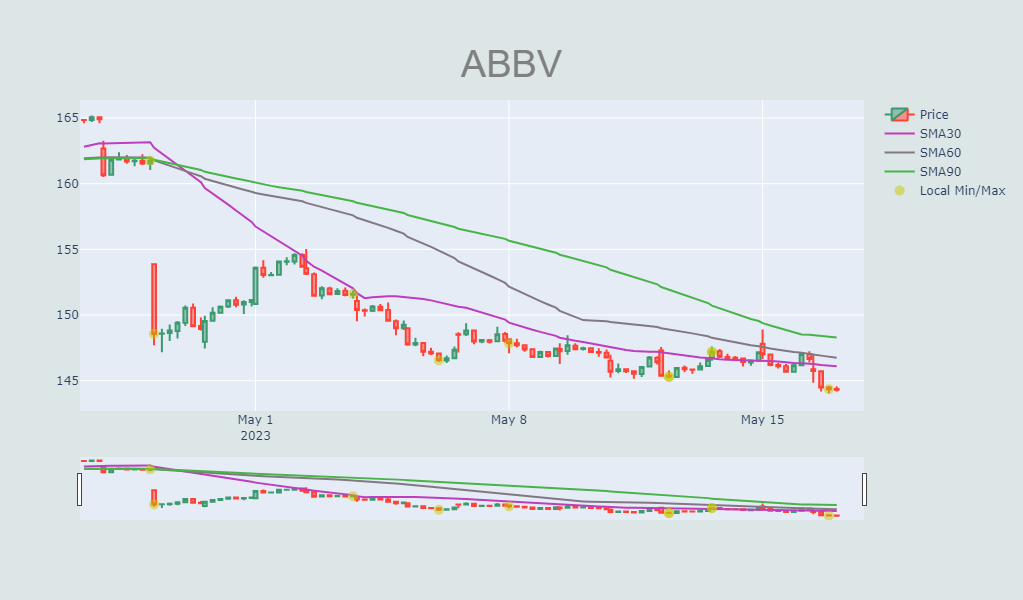

In [10]:
ID = list(df2[df2.date==df2[df2['event']=='FW'].date.min()].index)[0]
chartdf = df2.iloc[ID-10:ID+95].copy()
minmax2 = minmax[(minmax.date>=chartdf.date.min())&(minmax.date<=chartdf.date.max())].copy()
fig = go.Figure()
fig = go.Figure(data=[go.Candlestick(x=chartdf['date'],
                open=chartdf['open'],
                high=chartdf['high'],
                low=chartdf['low'],
                close=chartdf['close'],
                name='Price')])
for n in SMAs:
    rgb = 'rgb({},{},{})'.format(250-n*2,n*2,250-n*2)
    fig.add_trace(go.Scatter(x=chartdf['date'],
                y=chartdf['SMA{}'.format(n)],
                mode='lines',
                name='SMA{}'.format(n),
                line=dict(color=rgb)))
fig.add_trace(go.Scatter(x=minmax2['date'],
                y=minmax2['close'],
                mode='markers',
                name='Local Min/Max',
                marker=dict(color='rgb(200,200,0)',
                            size=10,
                            opacity=0.5)
                        ))
fig.update_xaxes(
        rangeslider_visible=True,
        rangebreaks=[
            # NOTE: Below values are bound (not single values), ie. hide x to y
            dict(bounds=["sat", "mon"]),  # hide weekends, eg. hide sat to before mon
            dict(bounds=[16, 9.5], pattern="hour"),  # hide hours outside of 9.30am-4pm
            #dict(values=["2024-12-25", "2024-01-01","2024-01-15","2024-02-19"])  # hide holidays (Christmas and New Year's, etc)
        ]
    )
fig.update_layout(title={'text':ticker, 'xanchor':'center', 'yanchor':'top','x':0.5},
                height=600,
                title_font={"family":"arial","color":"gray","size":38},
                paper_bgcolor='rgb(220,230,230)'
                 )
fig.show()